In [40]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

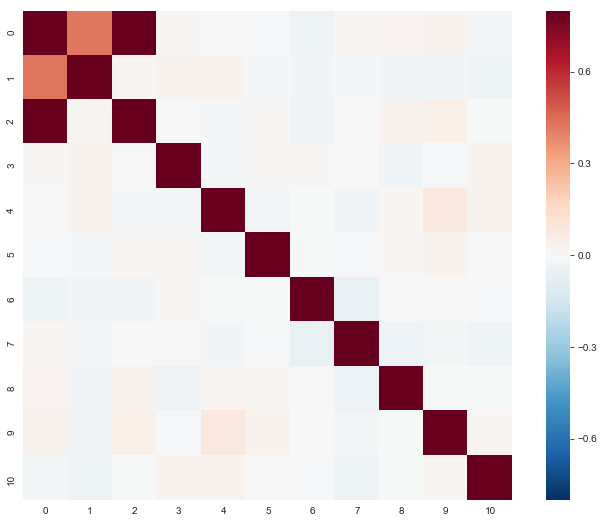

In [2]:
# set seed
np.random.seed(42)

# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')
plt.show()

R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475250782068


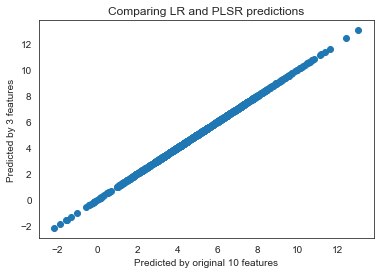

In [3]:
# Fit a linear model with all 10 features

# call y again to see if it runs second iteration of random.normal
y

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

"PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc)."

There seems to be no correlation between the features....

## Practice PLSR

In [4]:
def PLSR_practice(n, yvar=y):

    regr1 = linear_model.LinearRegression()
    regr1.fit(X, yvar)
    print('R-squared regression:', regr1.score(X, yvar))
   
    pls = PLSRegression(n_components=n)

    # Reduce X to R(X) and regress on y.
    pls.fit(X, yvar)

    # Save predicted values.
    Y_pred = regr1.predict(X)
    Y_PLS_pred = pls.predict(X)
    print('R-squared PLSR:', pls.score(X, yvar))

    # Compare the predictions of the two models
    plt.scatter(Y_pred,Y_PLS_pred) 
    plt.xlabel('Predicted by original 10 features')
    plt.ylabel('Predicted by ' + str(n) +' features')
    plt.title('Comparing LR and PLSR predictions')
    plt.show()

Number of components: 1
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8468141216441761


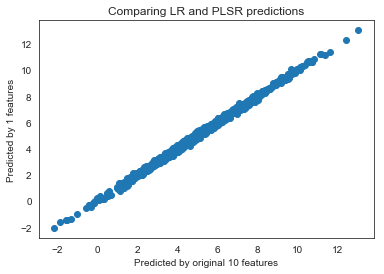

Number of components: 2
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494379914423182


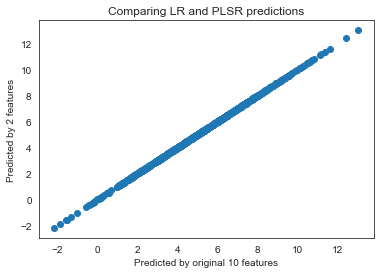

Number of components: 3
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475250782068


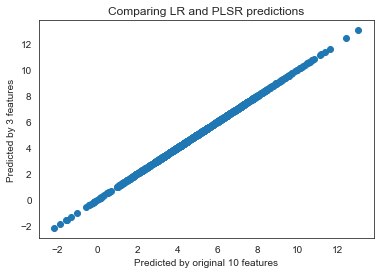

Number of components: 4
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475531629636


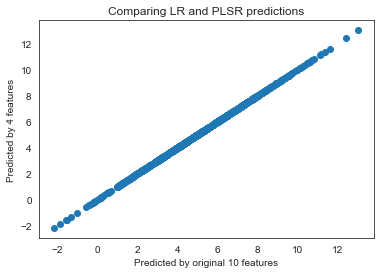

Number of components: 5
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475532657373


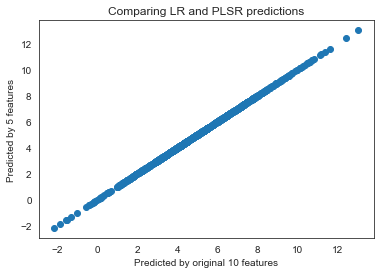

Number of components: 6
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475532670636


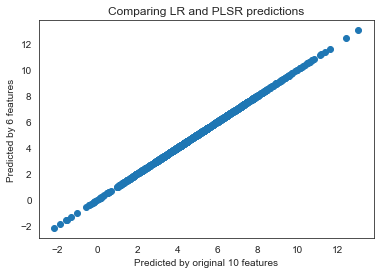

Number of components: 7
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475532670653


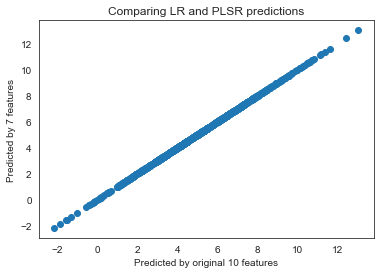

Number of components: 8
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475532670653


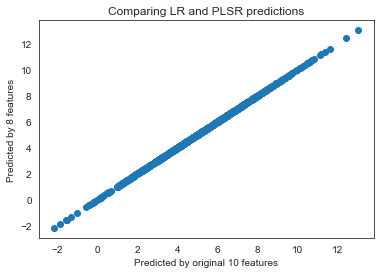

Number of components: 9
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475532670653


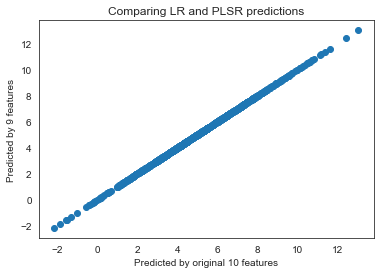

Number of components: 10
R-squared regression: 0.8494475532670653
R-squared PLSR: 0.8494475532670653


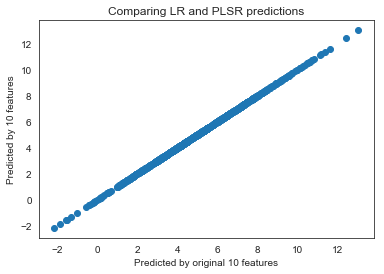

In [5]:
for x in range(1,11):
    print('Number of components: '+str(x))
    PLSR_practice(x,y)

## Change y 

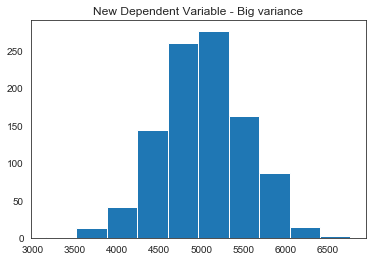

Var : 507.77640802588184


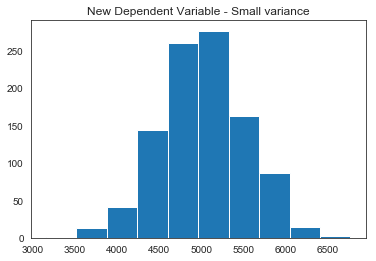

Var : 1.441376624277975


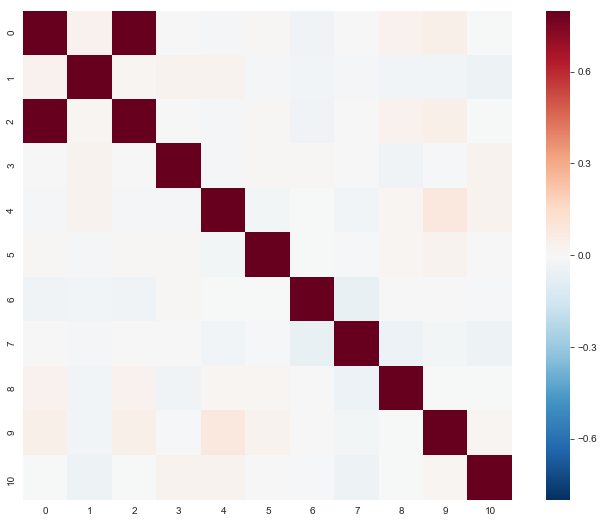

In [26]:
# seed
np.random.seed(42)

y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
np.random.seed(42)
y1 = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

np.random.seed(42)
newybig = X[:, 0] + 500 * X[:, 1] + np.random.normal(size=n * 1) + 5000

plt.hist(newybig)
plt.title('New Dependent Variable - Big variance')
plt.show()

print('Var:', np.std(newybig))

np.random.seed(42)
newysmall = X[:, 0] + .005 * X[:, 1] + np.random.normal(size=n * 1) + 5000

plt.hist(newybig)
plt.title('New Dependent Variable - Small variance')
plt.show()

print('Var:', np.std(newysmall))

f, ax = plt.subplots(figsize=(12, 9))
corrmat1 = pd.DataFrame(np.insert(X, 0, newy, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat1,vmin=-.8, vmax=.8, square=True, cmap='RdBu_r')
plt.show()



In [7]:
#print(y1==y)

Really confused as to why the seed value is not creating the same random.normal sequence for y1.  It will only work if I recreate y in the same cell.

Turns out, the function is running the random.normal a second time.  The fix is to call y for the original regression to force a second iteration of random.normal.

First Rsquared (without calling y) = 0.8494475532670653  
After calling y and running regression with function Rsquared = 0.8473340412176245

R-squared regression: 0.8473340412176245
R-squared PLSR: 0.8473340412176245


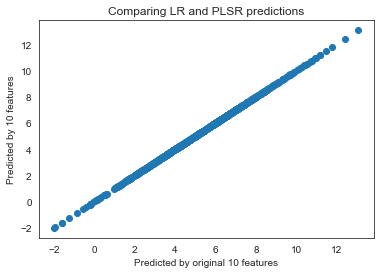

In [8]:
PLSR_practice(10,y1)

R-squared regression: 0.8473340412176245
R-squared PLSR: 0.8473340148356049


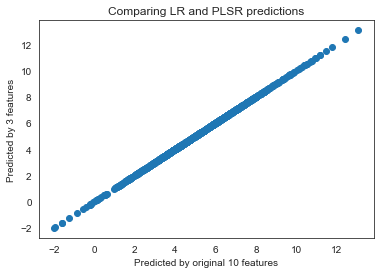

In [9]:
PLSR_practice(3, y1)

R-squared regression: 0.9999963140683278
R-squared PLSR: 0.9999961523229649


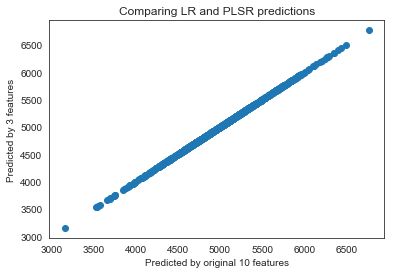

In [34]:
PLSR_practice(3, newybig)

R-squared regression: 0.5425565964471759
R-squared PLSR: 0.5425565004099975


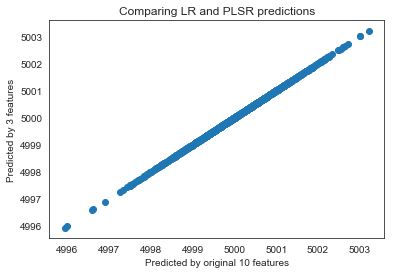

In [27]:
PLSR_practice(3, newysmall)

Yesterday (for whatever reason) when I adjusted the y like the following: +500*[X:,1] (large amount of variance) and/or +5000 (shifting the mean) the Rsquared would go to something like -5000 for the LR.  Today I cannot recreate this issue.

What I do notice is that as I increase the variance of y the Rsquared increases, and vice versa (smaller magnitude = smaller Rsquared).  
One way to calculate: \begin{equation*} R^2 = 1.0 - \frac{\text{absolute error variance}}{\text{dependent variable variance}}\end{equation*}  
Thus as the the dependent variable variance increases we can see the Rsquared will increase.

In [43]:
regr2 = linear_model.LinearRegression()
regr2.fit(X, newybig)
y_predbig = regr2.predict(X)

print(explained_variance_score(newybig, y_predbig))
print(mean_squared_error(newybig, y_predbig))
print(mean_absolute_error(newybig, y_predbig))

print(1-(mean_absolute_error(newybig, y_predbig)/np.var(newybig)))

0.9999963140683278
0.9503691242675404
0.7759306480665291
0.999996990614196


In [44]:
regr3 = linear_model.LinearRegression()
regr3.fit(X, newysmall)
y_predsmall = regr3.predict(X)

print(explained_variance_score(newysmall, y_predsmall))
print(mean_squared_error(newysmall, y_predsmall))
print(mean_squared_error(newysmall, y_predsmall))

print(1-(mean_absolute_error(newysmall, y_predsmall)/np.var(newysmall)))

0.5425565964471759
0.9503691242675452
0.9503691242675452
0.6265194780543177
